In [114]:
import os
import pandas as pd
import gmaps
import googlemaps as g
import yaml
import numpy
import matplotlib.pyplot as plt
from IPython.display import Image
import foursquare
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import linear_model


%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

# Loading dataset
df = pd.read_csv(os.path.join('..', 'datasets', 'venue_attributes.csv'))
df = df.set_index('foursquare_id')
df.drop(['Unnamed: 0'],inplace = True, axis = 1)
df.head()


,foursquare_name,inspection_score,checkinsCount,createdAt,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount
foursquare_id,,,,,,,,,,,
3fd66200f964a52001ed1ee3,Pacific Cafe,86.0,1389,1071014400,True,True,78,2.0,8.1,59.0,24
3fd66200f964a52005ed1ee3,Taiwan Restaurant 台灣飯店,74.1,2173,1071014400,True,True,185,1.0,7.2,37.0,12
3fd66200f964a52006ed1ee3,Tanuki Restaurant 狸壽司,92.0,1149,1071014400,True,True,46,2.0,7.9,34.0,13
3fd66200f964a52013ed1ee3,Acquerello,98.7,1185,1071014400,True,True,72,4.0,8.5,108.0,41
3fd66200f964a52017ed1ee3,Ebisu,80.0,5047,1071014400,True,True,254,3.0,9.4,307.0,88


In [115]:
df.createdAt.describe()

count         4482.0
mean    1287802459.4
std       91464569.5
min     1071014400.0
25%     1247093230.8
50%     1267637213.0
75%     1344520490.0
max     1503523209.0
Name: createdAt, dtype: float64

In [116]:
df.count()

foursquare_name     4482
inspection_score    4482
checkinsCount       4482
createdAt           4482
hasMenu             4482
isVerified          4482
photos              4482
price               3362
rating              3320
ratingSignals       3320
tipCount            4482
dtype: int64

In [117]:
df.price.value_counts(dropna = False)

1.0    1630
2.0    1406
nan    1120
3.0     271
4.0      55
Name: price, dtype: int64

In [118]:
# Identifying Nulls for the rating attribute
null_data = df[df['rating'].isnull()]
null_data.head()


,foursquare_name,inspection_score,checkinsCount,createdAt,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount
foursquare_id,,,,,,,,,,,
3fd66200f964a520c3ec1ee3,Brisas De Acapulco,86.3,122,1071014400,True,True,2,2.0,nan,nan,1
3fd66200f964a520d2ec1ee3,Russian Bear Restaurant,96.0,1,1071014400,False,True,0,2.0,nan,nan,0
3fd66200f964a520eeec1ee3,Ernestos,91.9,121,1071014400,True,True,0,2.0,nan,nan,2
4192ab80f964a520061e1fe3,Glas Kat,97.0,821,1100131200,False,True,3,3.0,nan,nan,8
43920c94f964a520682b1fe3,Moscone Center,96.4,34935,1133644948,False,True,2855,nan,nan,nan,52


In [119]:
# Drop all rows where price is not available or hasn't yet been rated
df.dropna(subset = ['price'], inplace = True)
df.dropna(subset = ['rating'], inplace = True)
len(df)

2853

In [120]:
df['timeNow']=1503690025
df['timeSinceCreation'] = df['timeNow']-df['createdAt']
df['daysSinceCreation'] = df['timeSinceCreation']/60/60/24.0
df['checkinsPerDay'] = df['checkinsCount']/df['daysSinceCreation']
df.drop(['createdAt'],inplace = True, axis = 1)
df.drop(['timeNow'],inplace = True, axis = 1)
df.drop(['timeSinceCreation'],inplace = True, axis = 1)
df.drop(['daysSinceCreation'],inplace = True, axis = 1)
df.drop(['checkinsCount'],inplace = True, axis = 1)
# df = df.set_index('foursquare_id')
# df.rename(columns={'foursquare_id': 'foursquareId'})
# df.rename(columns={'foursquare_name': 'foursquareName'})
# df.rename(columns={'inspection_score': 'inspectionScore'})
# df.rename(index=str, columns={"A": "a", "B": "c"})
df



,foursquare_name,inspection_score,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount,checkinsPerDay
foursquare_id,,,,,,,,,,
3fd66200f964a52001ed1ee3,Pacific Cafe,86.0,True,True,78,2.0,8.1,59.0,24,0.3
3fd66200f964a52005ed1ee3,Taiwan Restaurant 台灣飯店,74.1,True,True,185,1.0,7.2,37.0,12,0.4
3fd66200f964a52006ed1ee3,Tanuki Restaurant 狸壽司,92.0,True,True,46,2.0,7.9,34.0,13,0.2
3fd66200f964a52013ed1ee3,Acquerello,98.7,True,True,72,4.0,8.5,108.0,41,0.2
3fd66200f964a52017ed1ee3,Ebisu,80.0,True,True,254,3.0,9.4,307.0,88,1.0
3fd66200f964a52018f11ee3,Durty Nelly's,93.1,False,True,103,2.0,7.5,78.0,20,0.5
3fd66200f964a52019f11ee3,Art's Cafe,92.5,True,True,167,1.0,8.8,190.0,82,0.8
3fd66200f964a5201af11ee3,Grubstake Diner,98.0,True,True,193,2.0,8.1,271.0,108,1.4
3fd66200f964a5201bed1ee3,Fringale,88.6,True,True,76,3.0,7.7,93.0,23,0.4


In [121]:
df = df*1
df[df['foursquare_name'] == 'Burma Superstar']


,foursquare_name,inspection_score,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount,checkinsPerDay
foursquare_id,,,,,,,,,,
42cc7080f964a520e7251fe3,Burma Superstar,89.8,1,1,599,2.0,9.3,1139.0,345,3.5


In [122]:
# Splitting into test and train datasets

df_train, df_test = train_test_split(df,test_size=0.4, random_state=42)

In [123]:
df_train

,foursquare_name,inspection_score,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount,checkinsPerDay
foursquare_id,,,,,,,,,,
56b28aa9498ec9031e9f4b0a,Matador,96.0,0,1,32,2.0,7.6,112.0,17,1.5
4a3bf09ef964a520efa01fe3,Portico,88.1,0,1,38,1.0,6.7,93.0,35,1.5
50ab8755e4b0869279a80872,Kitchen Story,76.1,0,1,875,2.0,8.8,1047.0,190,6.9
4ab02385f964a520296620e3,Cafe La Taza,91.4,1,1,75,1.0,7.6,111.0,35,0.9
4b7ca0b9f964a520769e2fe3,Subway,90.0,1,1,6,1.0,6.2,7.0,1,0.2
43695300f964a52084291fe3,Citrus Club,70.6,1,1,96,2.0,7.4,190.0,64,1.2
4bfd7eebb68d0f4744dfe857,Chipotle Mexican Grill,96.2,1,1,94,1.0,6.1,114.0,51,2.8
4b1d5ebcf964a5207a0f24e3,Jojo's Cafe 茶餐廳,85.2,1,1,11,1.0,6.2,23.0,9,0.3
4a106844f964a520be761fe3,Hon's Wun Tun House,98.0,1,1,87,1.0,7.2,59.0,24,0.5


In [126]:
corr = df_train.corr()
corr

,inspection_score,hasMenu,isVerified,photos,price,rating,ratingSignals,tipCount,checkinsPerDay
inspection_score,1.0,-0.1,nan,0.0,0.0,0.1,0.0,0.0,0.1
hasMenu,-0.1,1.0,nan,0.2,0.2,0.1,0.2,0.2,0.1
isVerified,nan,nan,nan,nan,nan,nan,nan,nan,nan
photos,0.0,0.2,nan,1.0,0.2,0.4,0.9,0.9,0.8
price,0.0,0.2,nan,0.2,1.0,0.3,0.2,0.2,0.2
rating,0.1,0.1,nan,0.4,0.3,1.0,0.5,0.5,0.5
ratingSignals,0.0,0.2,nan,0.9,0.2,0.5,1.0,1.0,0.9
tipCount,0.0,0.2,nan,0.9,0.2,0.5,1.0,1.0,0.8
checkinsPerDay,0.1,0.1,nan,0.8,0.2,0.5,0.9,0.8,1.0


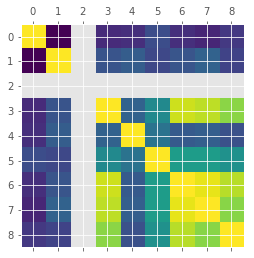

In [127]:
plt.matshow(corr)